# **Logistic regression**

In [ ]:
"""
Definition:
    Logistic regression is a supervised machine learning algorithm used for classification.
    It predicts the probability that an input belongs to a particular class (usually binary: 0 or 1).
    Unlike linear regression, logistic regression uses the logistic (sigmoid) function to map
    predictions into the range [0,1].

Formula:
    P(y=1|x) = 1 / (1 + e^-(β0 + β1*x1 + β2*x2 + ... + βn*xn))

    Where:
        - P(y=1|x) : Probability that output y = 1 given input x
        - x1, x2, ..., xn : Input features
        - β0 : Intercept (bias term)
        - β1, β2, ..., βn : Coefficients (weights learned from data)
        - e : Euler’s number (~2.718)
    
    Classification rule (threshold = 0.5 by default):
        - If P(y=1|x) ≥ 0.5 → Predict class 1
        - If P(y=1|x) < 0.5 → Predict class 0

Key Notes:
    - The sigmoid function compresses outputs into [0,1], making them valid probabilities.
    - Coefficients are estimated using Maximum Likelihood Estimation (MLE) with optimization
      techniques like Gradient Descent.
    - Variants:
        * Binary Logistic Regression → Two outcomes (Yes/No, 0/1)
          Example: Predict if an email is spam or not.
        * Multinomial Logistic Regression → More than two unordered outcomes
          Example: Predict which fruit an image is (Apple, Banana, Orange).
        * Ordinal Logistic Regression → Ordered categories
          Example: Predict customer satisfaction (Poor, Average, Good, Excellent).

Applications:
    - Medical: Disease prediction (Yes/No)
    - Marketing: Customer purchase prediction
    - Email: Spam detection

Advantages:
    - Simple and interpretable
    - Outputs probabilities (not just classes)
    - Works well for linearly separable data

Limitations:
    - Struggles with non-linear boundaries
    - Sensitive to outliers
    - Poor performance on highly imbalanced data without adjustments
"""

In [ ]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split   # To split data into training and testing sets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix # For model evaluation

In [3]:
# Load dataset from GitHub repository
df = pd.read_csv('https://raw.githubusercontent.com/sharmaroshan/Heart-UCI-Dataset/master/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Separate features (X) and target (y)
# "target" column is the label we want to predict (0 = no heart disease, 1 = heart disease)
x = df.drop("target", axis=1) # All columns except "target"
y = df["target"]  # Only the "target" column

In [5]:
# Split the dataset into training (80%) and testing (20%) sets
# random_state ensures reproducibility (same split every time)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [6]:
# Initialize Logistic Regression model
# Logistic Regression does not have a direct mathematical solution (like Linear Regression).
# Instead, it uses iterative optimization methods (like gradient descent) to find the best coefficients.
# max_iter specifies the maximum number of iterations allowed for this optimization process.
# If the algorithm does not converge (find stable coefficients) within this limit, it will raise a warning.
# Increasing max_iter is often necessary for large or complex datasets.
model = LogisticRegression(max_iter=1100)
model.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1100
,multi_class,'deprecated'


In [7]:
# Use the trained model to make predictions on the test dataset
y_pred = model.predict(x_test)

[[25  4]
 [ 3 29]]


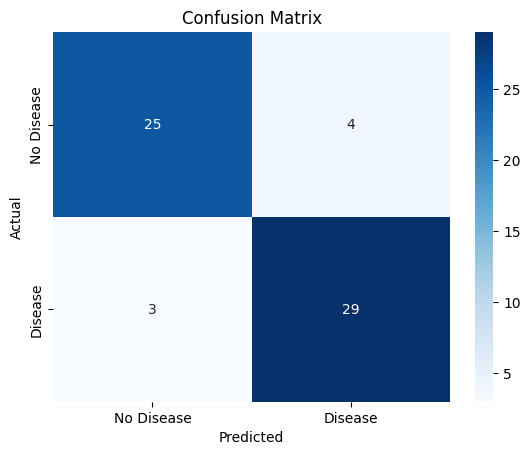

In [13]:
# Generate a confusion matrix to compare actual labels (y_test) with predicted labels (y_pred)
cm = confusion_matrix(y_test, y_pred)
print(cm)
# Visualize the confusion matrix using a heatmap
# annot=True → show numbers inside cells
# cmap="Blues" → color scheme
# xticklabels / yticklabels → add custom labels for better readability
sbn.heatmap(cm, annot=True, cmap="Blues", xticklabels=["No Disease", "Disease"], yticklabels=["No Disease","Disease"])

# Add axis labels and title for clarity
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# top left: True Negative
# bottom right: True Positive

# top right: False Positive
# bottom left: False Negative

In [10]:
# Print classification metrics: precision, recall, f1-score, and accuracy
# This gives a more detailed performance evaluation than accuracy alone
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [11]:
"""
Classification Report Metrics:

The classification_report in scikit-learn returns several key metrics 
derived from the confusion matrix:

Confusion Matrix Layout:
    Actual Positive (1) → Disease
    Actual Negative (0) → No Disease

                  Predicted Positive   Predicted Negative
    Actual Positive (1)       TP               FN
    Actual Negative (0)       FP               TN

Where:
    TP = True Positive
    TN = True Negative
    FP = False Positive
    FN = False Negative

Metrics:

1. Accuracy:
    - Proportion of total predictions that are correct.
    Formula:
        Accuracy = (TP + TN) / (TP + TN + FP + FN)

2. Precision (Positive Predictive Value):
   - Precision measures: "Out of all predicted positives, how many are actually correct?"

   For Disease (class 1):
       Precision_1 = TP / (TP + FP)

   For No Disease (class 0):
       Precision_0 = TN / (TN + FN)

3. Recall (Sensitivity or True Positive Rate):
   - Recall measures: "Out of all actual positives, how many were correctly predicted?"

   For Disease (class 1):
       Recall_1 = TP / (TP + FN)

   For No Disease (class 0):
       Recall_0 = TN / (TN + FP)

4. F1-Score:
   - Harmonic mean of Precision and Recall.
   - Balances correctness (precision) and completeness (recall).

   Formula (general):
       F1 = 2 * (Precision * Recall) / (Precision + Recall)

   For Disease (class 1):
       F1_1 = 2 * (Precision_1 * Recall_1) / (Precision_1 + Recall_1)

   For No Disease (class 0):
       F1_0 = 2 * (Precision_0 * Recall_0) / (Precision_0 + Recall_0)

5. Support:
   - Number of actual samples belonging to each class.

   For Disease (class 1):
       Support_1 = TP + FN

   For No Disease (class 0):
       Support_0 = TN + FP
       
6. Macro Average
   - Simple average of metrics across classes.
   - Treats all classes equally, regardless of support (class size).

   Example (Precision):
       Macro Precision = (Precision_0 + Precision_1) / 2
       
7. Weighted Average
   - Average of metrics across classes **weighted by support (class size)**.
   - Larger classes contribute more to the final score.
   - Useful when dataset is imbalanced.

   Example (Precision):
       Weighted Precision = [(Precision_0 * Support_0) + (Precision_1 * Support_1)] / (Support_0 + Support_1)


**Summary**
- Precision → How reliable positive predictions are.
- Recall    → How many actual positives were captured.
- F1-score  → Balance between precision and recall.
- Support   → Size of the actual class in the dataset.
- Accuracy  → Overall correct predictions.
- Macro avg → Equal importance to each class.
- Weighted avg → Adjusts for class imbalance using support.

Usage Guidelines:
    * Focus on Precision when False Positives are very costly 
      (e.g., spam detection).
    * Focus on Recall when False Negatives are very costly 
      (e.g., disease detection).
    * Use F1-score when a balance between Precision and Recall is required.
"""

'\nClassification Report Metrics:\n\nThe classification_report in scikit-learn returns several key metrics \nderived from the confusion matrix:\n\nConfusion Matrix Layout:\n    Actual Positive (1) → Disease\n    Actual Negative (0) → No Disease\n\n                  Predicted Positive   Predicted Negative\n    Actual Positive (1)       TP               FN\n    Actual Negative (0)       FP               TN\n\nWhere:\n    TP = True Positive\n    TN = True Negative\n    FP = False Positive\n    FN = False Negative\n\nMetrics:\n\n1. Accuracy:\n    - Proportion of total predictions that are correct.\n    Formula:\n        Accuracy = (TP + TN) / (TP + TN + FP + FN)\n\n2. Precision (Positive Predictive Value):\n   - Precision measures: "Out of all predicted positives, how many are actually correct?"\n\n   For Disease (class 1):\n       Precision_1 = TP / (TP + FP)\n\n   For No Disease (class 0):\n       Precision_0 = TN / (TN + FN)\n\n3. Recall (Sensitivity or True Positive Rate):\n   - Recall